# World Happiness Report Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict


#TO Build a ML Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error


In [2]:
df = pd.read_csv('happiness_score.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


1.Continuous Features: happiness score,Standard error,Economy,Family,Health,Freedom,Trust,Generosity,DystopiaResidual
2.Categorical features: Country,Region


In [3]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df.shape

(158, 12)

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
df.duplicated().sum()

0

# Descriptive Statistics

In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1.this dataset contain information for toatl of 158 countries.
2.There we can see the difference between 75% and max in some column are high it means there outliers are present.
3.mean is greater than meadian(50%) it means perticular column is skewed,but we can see there is not much difference in values in many columns.

# Univariate analysis

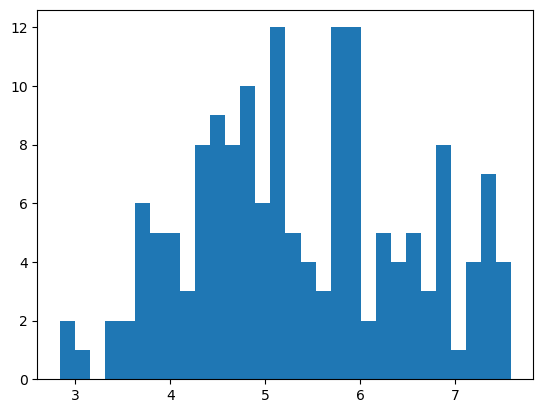

In [9]:
plt.hist(df['Happiness Score'],bins =30)
plt.show()

In [10]:
df['Happiness Score'].max(),df['Happiness Score'].min()

(7.587, 2.839)

1.Here created histogram of 'happiness Score' and found highest score and lowest score of happiness.
2.highest score is 7.5 and lowest score is 2.8.

<Figure size 1000x500 with 0 Axes>

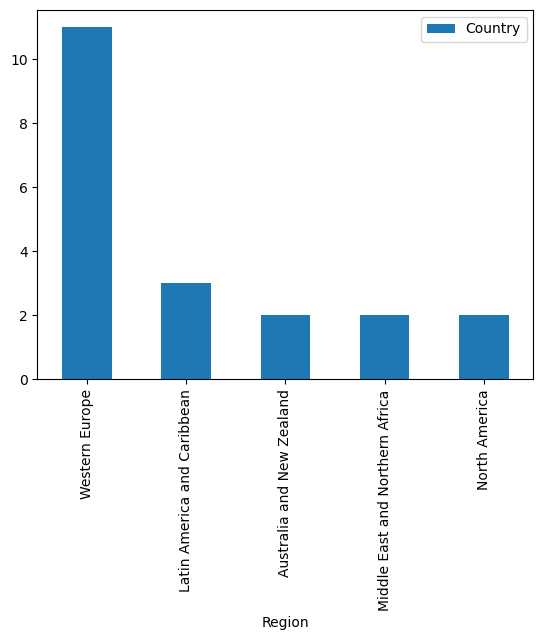

In [11]:
# Visualizing Regions with Top happiness score
plt.figure(figsize=(10,5))
df.head(20).groupby('Region').agg({'Country':'count'}).sort_values(by='Country',ascending=False).plot(kind='bar')
plt.show()

1.This plot shows the highest happiness score in top 5 countries.
2.Western Europe Region have  highest happiness score.

# Distribution plot

In [12]:
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('num_col:',num_col)

num_col: ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


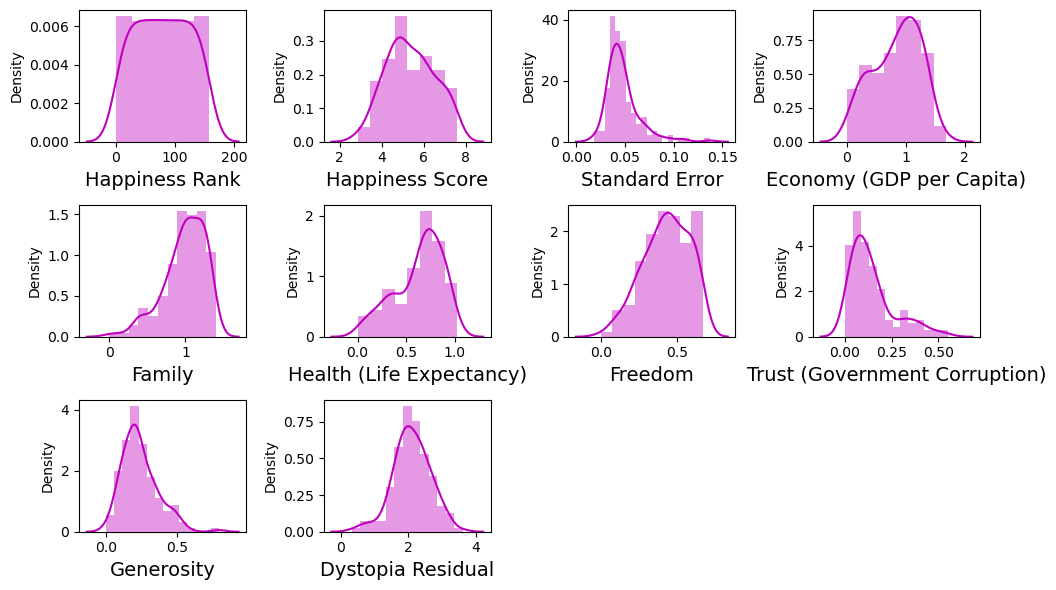

In [13]:
plt.figure(figsize = (10,6),facecolor = 'white')
plotnum = 1
for col in num_col:
    if plotnum<=12:
        a = plt.subplot(3,4,plotnum)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col,fontsize =14)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnum+=1
plt.tight_layout()
        

1.little bit skewness is present in some columns of dataset.
2.As we can see standard error,trust features,Generiosity skewed to right.
3.family,health,freedom are skewd to left.
4.hppiness rannk 

# Boxplot

<AxesSubplot:xlabel='Region', ylabel='Family'>

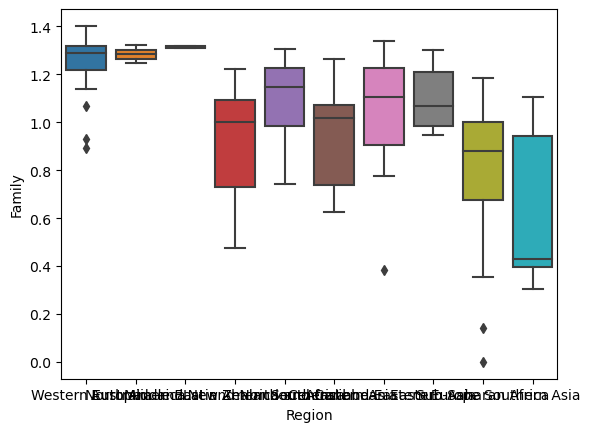

In [14]:
sns.boxplot(x=df['Region'],y = df['Family'])

<AxesSubplot:xlabel='Region', ylabel='Freedom'>

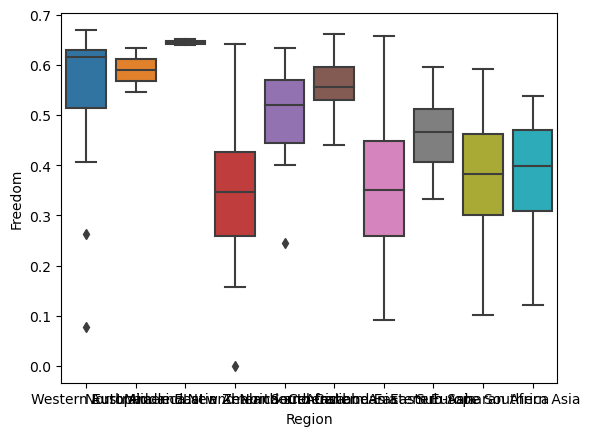

In [15]:
sns.boxplot(x=df['Region'],y = df['Freedom'])

In [16]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

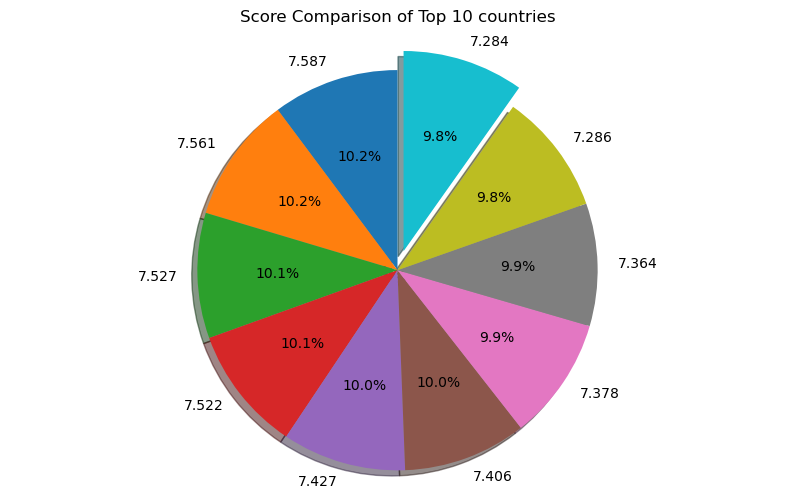

In [17]:
country10 = df['Country'].iloc[0:10]
country10 = df['Happiness Score'].iloc[0:10]
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(country10, explode = (0,0,0,0,0,0,0,0,0,0.1),labels = country10,autopct='%1.1f%%', shadow=True,startangle=90)
ax.axis('equal')
plt.title('Score Comparison of Top 10 countries')
plt.show()

1.country10 variable contain top10 country names from the 'Country' column of dataframe.

2.pie chart display comparison of happiness score for the top10 countries.


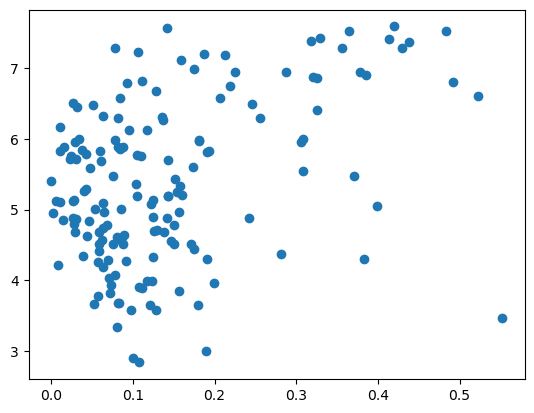

In [18]:
plt.scatter(df['Trust (Government Corruption)'],df['Happiness Score'])
plt.show()

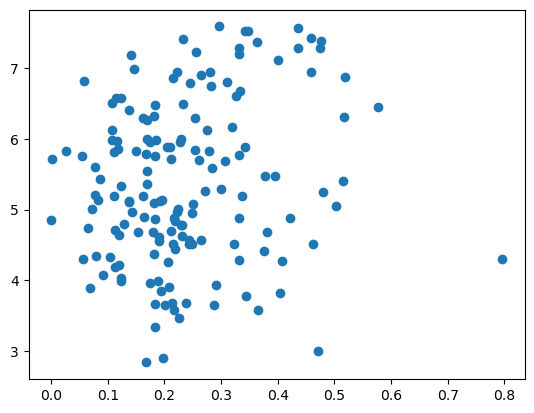

In [19]:
plt.scatter(df['Generosity'],df['Happiness Score'])
plt.show()

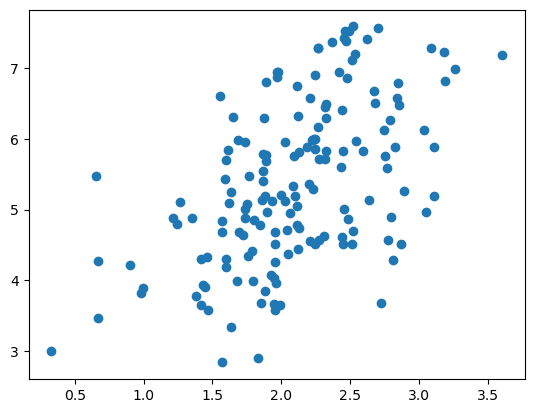

In [20]:
plt.scatter(df['Dystopia Residual'],df['Happiness Score'])
plt.show()

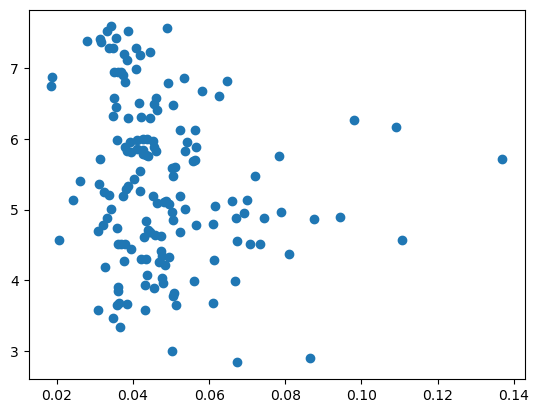

In [21]:
plt.scatter(df['Standard Error'],df['Happiness Score'])
plt.show()

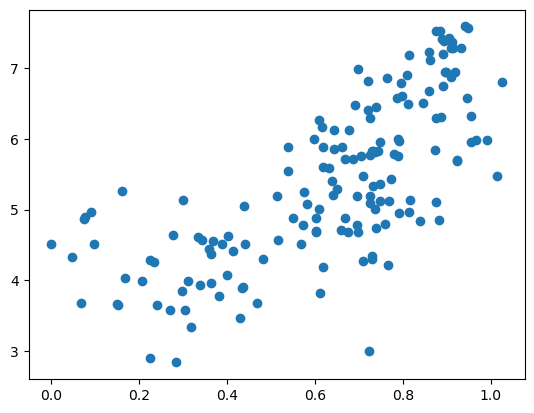

In [22]:
plt.scatter(df['Health (Life Expectancy)'],df['Happiness Score'])
plt.show()

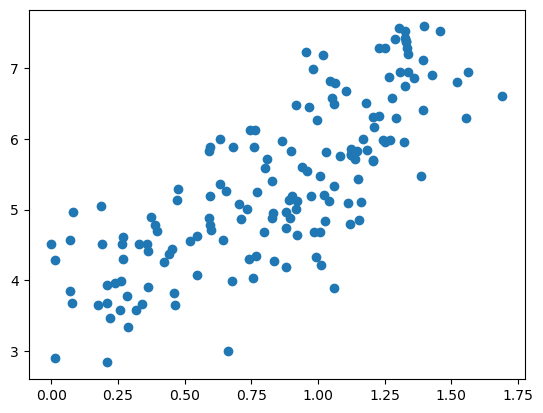

In [23]:
plt.scatter(df['Economy (GDP per Capita)'],df['Happiness Score'])
plt.show()

1.Above all plots which is showing relationship between all features and its Happiness Score.
2.It visualize this features relationship
Trust (Government Corruption),Generosity ,Dystopia Residual,Standard Error,Health (Life Expectancy),Economy (GDP per Capita) with 'Happiness Score'.
3.The highly correlated factors with Happiness Score are: Economy,Dystopia Residual,Health (Life Expectancy).

# Multivariate Analysis

In [24]:
# sns.pairplot(df,hue='Happiness Score',palette = 'Dark2')
# plt.show()

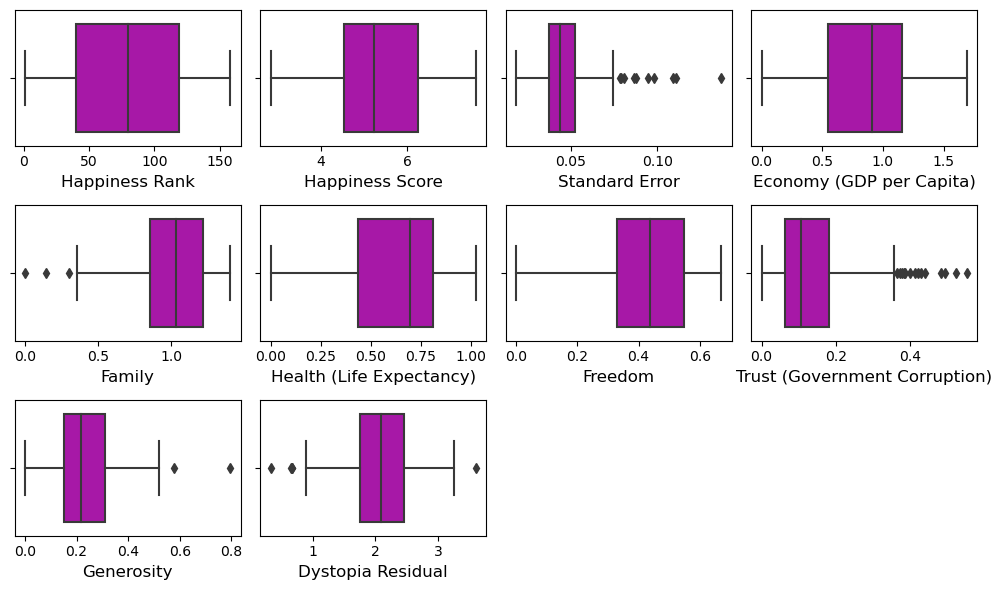

In [25]:
# distribution plot
plt.figure(figsize=(10,6),facecolor='white')
plot = 1
for col in num_col:
    if plot<=12:
        ax = plt.subplot(3,4,plot)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=14)
    plot+=1
plt.tight_layout()

1.Outliers present in standard error,trust,family,Dystopia Residual featurs.
2.data highly skewed in Trust(Government corruption) column.

In [26]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

1.Standard error:positive skewness to right side.
2.Economy: negative skewness to left side
3.family:negative skewness to left side.
4.Trust: positive skewness on right side

# Remove skewness

In [27]:
# Apply log transformation to standard error
df['Standard Error'] = np.log(df['Standard Error'])


In [28]:
df['Generosity'] = np.cbrt(df['Generosity'])

In [29]:
df['Trust (Government Corruption)'] = np.cbrt(df['Trust (Government Corruption)'])

In [30]:
df['Family'] = np.cbrt(df['Family'])

In [31]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -3.573056
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

1. Here we can see  After applying Log Transformation method on some columns we removed skewness of that.
2. we reduced  skewness of Standard error,Trust,Generosity features.


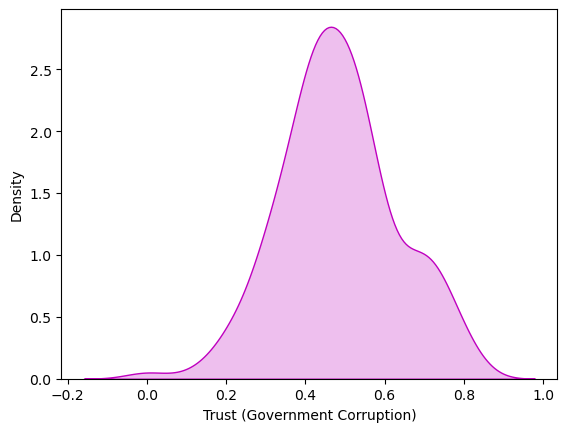

In [32]:
sns.distplot(df['Trust (Government Corruption)'],color='m',kde_kws={'shade':True},hist=False)
plt.show()

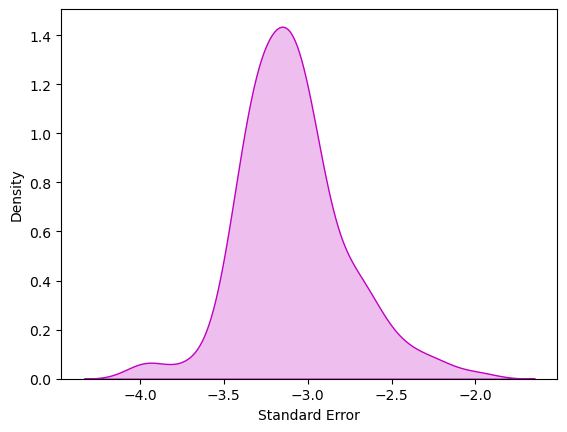

In [33]:
sns.distplot(df['Standard Error'],color='m',kde_kws={'shade':True},hist=False)
plt.show()

1.As we can see skewness has been removed from both column.

# Encoding Categorical Columns

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,-3.378165,1.39651,1.105076,0.94143,0.66557,0.748756,0.667029,2.51738
1,58.0,9.0,2,7.561,-3.019206,1.30232,1.119283,0.94784,0.62877,0.521036,0.758453,2.70201
2,37.0,9.0,3,7.527,-3.402799,1.32548,1.108089,0.87464,0.64938,0.784910,0.698903,2.49204
3,105.0,9.0,4,7.522,-3.249335,1.45900,1.099986,0.88521,0.66973,0.714677,0.702704,2.46531
4,24.0,5.0,5,7.427,-3.337378,1.32629,1.097684,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,-3.362746,0.22208,0.918031,0.42864,0.59201,0.820269,0.609371,0.67042
154,13.0,8.0,155,3.340,-3.308801,0.28665,0.707311,0.31910,0.48450,0.431066,0.567327,1.63328
155,136.0,4.0,156,3.006,-2.992737,0.66320,0.780185,0.72193,0.15684,0.573940,0.778484,0.32858
156,21.0,8.0,157,2.905,-2.446686,0.01530,0.746424,0.22396,0.11850,0.465116,0.582130,1.83302


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    float64
 1   Region                         158 non-null    float64
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.9 KB


In [37]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,-3.091128,0.846137,0.983069,0.630259,0.428615,0.483089,0.596606,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.314570,0.403121,0.128557,0.247078,0.150693,0.145875,0.122462,0.553550
min,0.000000,0.000000,1.000000,2.839000,-3.991066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,-3.289634,0.545808,0.949795,0.439185,0.328330,0.395095,0.531977,1.759410
50%,78.500000,4.500000,79.500000,5.232500,-3.124930,0.910245,1.009740,0.696705,0.435515,0.475071,0.600120,2.095415
75%,117.750000,8.000000,118.750000,6.243750,-2.950759,1.158448,1.066893,0.811013,0.549092,0.564887,0.676701,2.462415
max,157.000000,9.000000,158.000000,7.587000,-1.988285,1.690420,1.119283,1.025250,0.669730,0.820269,0.926721,3.602140


In [38]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -3.573056
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

# Correlation between Target variable and Other Features

In [39]:
cor = df.corr()
cor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.020949,0.037808,0.161990,0.037829,0.085684,0.059858,0.115876,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.062697,-0.260139,-0.178544,-0.357508,0.092567,0.213506,0.269423,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.190675,-0.785267,-0.618211,-0.735613,-0.556886,-0.304207,-0.141914,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.210296,0.780966,0.627187,0.724200,0.568211,0.326229,0.159029,0.530474
Standard Error,0.020949,-0.062697,0.190675,-0.210296,1.000000,-0.223477,-0.115187,-0.320471,-0.171718,-0.155685,-0.065877,0.052531
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.223477,1.000000,0.565688,0.816478,0.370300,0.205482,-0.059576,0.040059
Family,0.161990,-0.178544,-0.618211,0.627187,-0.115187,0.565688,1.000000,0.483297,0.317811,0.095928,0.031960,0.081203
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.320471,0.816478,0.483297,1.000000,0.360477,0.149556,0.044395,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.171718,0.370300,0.317811,0.360477,1.000000,0.461105,0.398210,0.062783
Trust (Government Corruption),0.059858,0.213506,-0.304207,0.326229,-0.155685,0.205482,0.095928,0.149556,0.461105,1.000000,0.266991,0.010769


1.there is -ve correlation beween happiness rank and happiness score,which indicate that the rank decreases,the happiness score tends to decrease.
2.there is weak negative correlation between Standard Error and happiness score.
3.there is positive correlation between Economy(GDP per capita).this indicate that countries with higher GDP per capita tend to have higher happiness score.And same senerio with Health ,Freedom and Family feature also.
4.Trust:this indicate countries with more perceived trust in their government tend to have slightly higher happiness score.


greater than 0.5 or greater than -0.5 ==Moderate correlation greater than ,
-0.7 or greater than 0.7== High correlation ,
-0.3 to 0.3 ====Less correlation,
0 ===========No relation

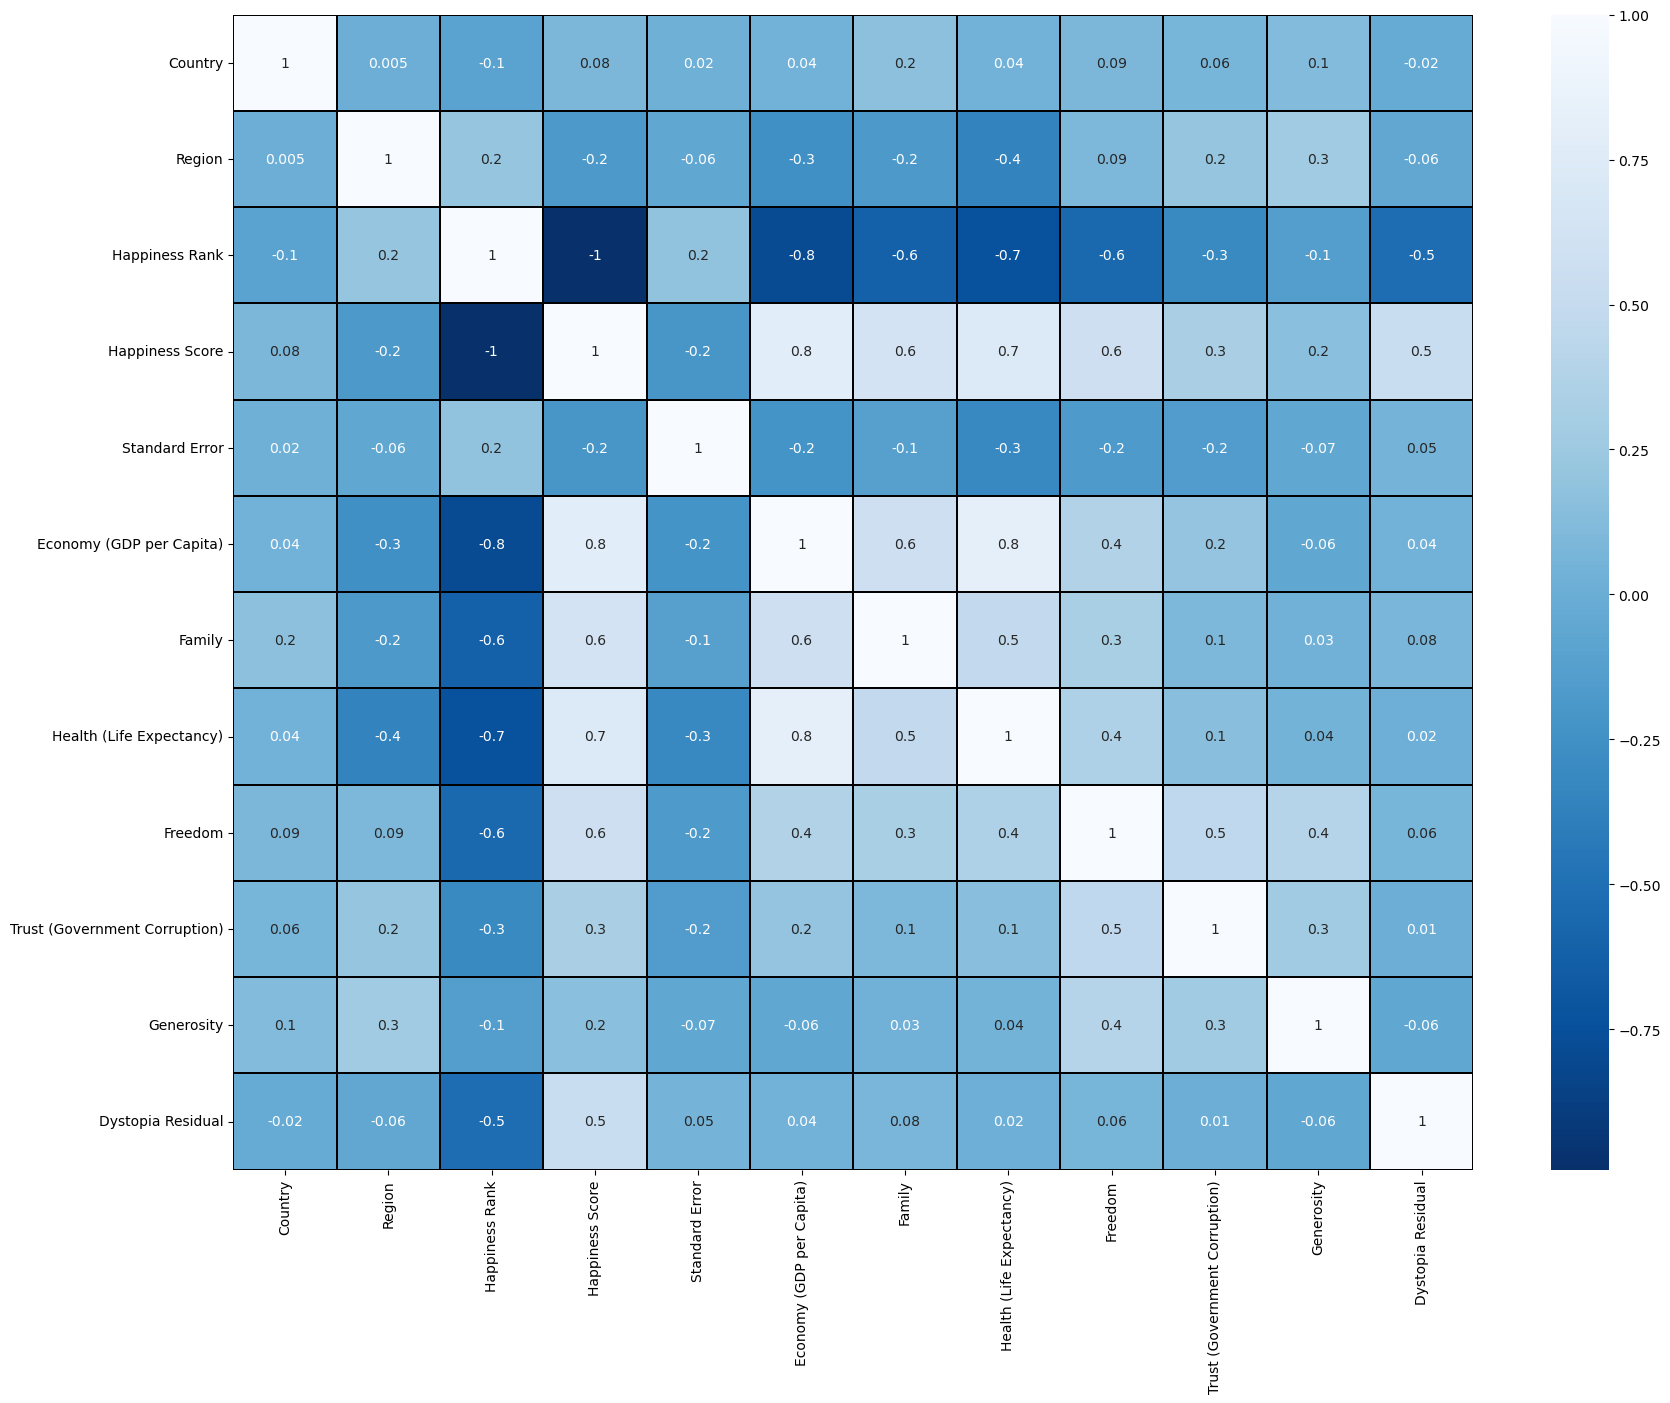

In [40]:
# Visualize correlation matrix by heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),linewidths=0.1, fmt='.1g',linecolor ='black',annot = True, cmap='Blues_r')

plt.yticks(rotation = 0)
plt.show()


1.As we observe above,there is -ve correlation beween happiness rank and happiness score,which indicate that the rank decreases,the happiness score tends to decrease.
2.there is weak negative correlation between Standard Error and happiness score.
3.there is positive correlation between Economy(GDP per capita).this indicate that countries with higher GDP per capita tend to have higher happiness score.And same senerio with Health ,Freedom and Family feature also.
4.Trust:this indicate countries with more perceived trust in their government tend to have slightly higher happiness score.

In [41]:
cor['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Health (Life Expectancy)         0.724200
Family                           0.627187
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.326229
Generosity                       0.159029
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.210296
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

Above we checking correlation of every feature with target variable.
target variable is an ;Happiness Score'

# Seperating Features and label

In [42]:
x = df.drop('Happiness Score',axis=1)
y = df['Happiness Score']

# feature scaling using Standard Scalarization

In [43]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
ax = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
ax

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,-1.721000,-0.915376,1.369621,0.952066,1.263408,1.577438,1.826993,0.576890,0.758258
1,-0.449465,1.300256,-1.699075,0.229364,1.135226,1.062927,1.289434,1.332456,0.260958,1.325808,1.092857
2,-0.909893,1.300256,-1.677149,-0.993935,1.192861,0.975580,0.992229,1.469659,2.075620,0.837993,0.712335
3,0.581016,1.300256,-1.655224,-0.504531,1.525130,0.912350,1.035145,1.605131,1.592625,0.869128,0.663893
4,-1.194920,-0.040302,-1.633299,-0.785305,1.194876,0.894384,1.118054,1.360416,1.428028,1.427657,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-0.866206,-1.552987,-0.507509,-0.818610,1.087740,2.318782,0.104570,-2.588925
154,-1.436096,0.965117,1.655501,-0.694170,-1.392303,-2.151835,-1.263362,0.372033,-0.357762,-0.239847,-0.843967
155,1.260695,-0.375441,1.677427,0.313775,-0.455245,-1.583173,0.372199,-1.809238,0.624780,1.489900,-3.208430
156,-1.260695,0.965117,1.699352,2.055159,-2.067566,-1.846619,-1.649648,-2.064472,-0.123602,-0.118581,-0.481985


After applying feature scaling using standardScale ,the values in each column have been transformed to have mean of approximately 0 and standard deviation of approximately 1.

# Checking VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,vif values,features
0,4.150831,Country
1,5.516874,Region
2,13.891934,Happiness Rank
3,115.660339,Standard Error
4,24.768025,Economy (GDP per Capita)
5,74.054297,Family
6,31.150536,Health (Life Expectancy)
7,17.828219,Freedom
8,16.232349,Trust (Government Corruption)
9,32.353052,Generosity


1.Standard error,family,Generosity,health features have high VIF values.
2.This features showing multicolinearity issue.
3.we arre going to drop this columns.

In [45]:
x.drop('Standard Error',axis=1, inplace=True)
x.drop('Family',axis=1, inplace=True)
x.drop('Generosity',axis=1, inplace=True)

In [46]:
vif = pd.DataFrame()
vif['vif values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,vif values,features
0,3.889755,Country
1,5.073752,Region
2,3.912020,Happiness Rank
3,18.712106,Economy (GDP per Capita)
4,23.156215,Health (Life Expectancy)
5,13.856625,Freedom
6,15.599447,Trust (Government Corruption)
7,9.771827,Dystopia Residual


In [47]:
x.drop('Health (Life Expectancy)',axis=1, inplace=True)

In [48]:
vif = pd.DataFrame()
vif['vif values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,vif values,features
0,3.878417,Country
1,4.783128,Region
2,3.758496,Happiness Rank
3,7.270588,Economy (GDP per Capita)
4,13.188550,Freedom
5,15.583258,Trust (Government Corruption)
6,9.458198,Dystopia Residual


# Modelling

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# XGBRegressor model

In [51]:
xgb = XGBRegressor(objective = 'reg:squarederror',
                  n_estimators=100,
                  learning_rate=0.1,
                  max_depth=3,
                  subsample = 0.8,
                  random_state = 42)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(xgb.score(x_test,y_test))

0.9990902168309499


In [52]:
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_pred))
print('np.sqrt(mean_absolute_error:',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

mean_absolute_error: 0.02954302501678463
mean_squared_error: 0.001290755481461972
np.sqrt(mean_absolute_error: 0.17188084540397347
r2_score: 0.9990902168309499


# Linear Regression

In [53]:
lin = LinearRegression()
lin.fit(x_train,y_train)
l_pred = lin.predict(x_test)
print(lin.score(x_test,y_test))

0.9880874618859978


In [54]:
print('mean_absolute_error:',mean_absolute_error(y_test,l_pred))
print('mean_squared_error:',mean_squared_error(y_test,l_pred))
print('np.sqrt(mean_absolute_error:',np.sqrt(mean_absolute_error(y_test,l_pred)))
print('r2_score:',r2_score(y_test,l_pred))

mean_absolute_error: 0.08713735409345277
mean_squared_error: 0.016900921441343753
np.sqrt(mean_absolute_error: 0.29519036924238024
r2_score: 0.9880874618859978


# SVR model

In [55]:
svr = SVR(kernel = 'linear')
svr.fit(x_train,y_train)
s_pred = svr.predict(x_test)
print(svr.score(x_test,y_test))

0.9871319504115231


In [56]:
print('mean_absolute_error:',mean_absolute_error(y_test,s_pred))
print('mean_squared_error:',mean_squared_error(y_test,s_pred))
print('np.sqrt(mean_absolute_error:',np.sqrt(mean_absolute_error(y_test,s_pred)))
print('r2_score:',r2_score(y_test,s_pred))

mean_absolute_error: 0.09251388550037187
mean_squared_error: 0.018256553986805965
np.sqrt(mean_absolute_error: 0.30416095328028525
r2_score: 0.9871319504115231


# Gradient Boosting Regressor

In [57]:
gb = GradientBoostingRegressor(n_estimators =100,
                              learning_rate=0.1,
                              max_depth=3,
                              subsample=0.8,
                              random_state=42)
gb.fit(x_train,y_train)
g_pred = gb.predict(x_test)


In [58]:
print('mean_absolute_error:',mean_absolute_error(y_test,g_pred))
print('mean_squared_error:',mean_squared_error(y_test,g_pred))
print('np.sqrt(mean_absolute_error:',np.sqrt(mean_absolute_error(y_test,g_pred)))
print('r2_score:',r2_score(y_test,g_pred))

mean_absolute_error: 0.035288782821011194
mean_squared_error: 0.0038557304280654606
np.sqrt(mean_absolute_error: 0.18785308839891665
r2_score: 0.9972823058292379


# Hyper Tuning Parameter

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {'n_estimators':[50,100,150],
             'learning_rate':[0.01,0.1,0.2],
             'max_depth':[3,4,5],
             'subsample':[0.8,0.9,1.0]}

In [61]:
grid = GridSearchCV(GradientBoostingRegressor(random_state=42),param_grid, cv=5)
grid.fit(x_train,y_train)
print('Best Parameters:',grid.best_params_)
print('best validation score:',grid.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.9}
best validation score: 0.9979558287040688


In [62]:
best_model = grid.best_estimator_
pred = best_model.predict(x_test)
mse = mean_squared_error(y_test,pred)
print('validation mean squared error:',mse)

validation mean squared error: 0.0026887090304071604


# Predicted Model

In [63]:
a = np.array(y_test)
df = pd.DataFrame()
df['predicted'] = g_pred
df['original'] = a
df

,predicted,original
0,4.333754,4.307
1,5.956274,5.987
2,4.203974,4.194
3,3.095757,2.905
4,5.057433,5.057
5,6.590263,6.574
6,4.875194,4.898
7,4.877827,4.876
8,4.928367,4.949
9,3.742633,3.931


----------------------------------------------------------------------------------------------------------